### Configuração

In [5]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
# Extract 
PATH = "/data/processed/inmet_raw.csv"
df = pd.read_csv(PATH)

---

## 1° Vista

Reconhecendo os dados. 

---

In [52]:
# Conhecendo df
df.head()

,DATA,HORA_UTC,PRECIPITACAO_TOTAL,PRESSAO_ATM_EST,PRESSAO_MAX_1H,PRESSAO_MIN_1H,RADIACAO_GLOBAL,TEMPERATURA_BULBO_SECO,TEMPERATURA_PONTO_ORVALHO,TEMPERATURA_MAX_1H,TEMPERATURA_MIN_1H,ORVALHO_MAX_1H,ORVALHO_MIN_1H,UMIDADE_REL_MAX_1H,UMIDADE_REL_MIN_1H,UMIDADE_REL,VENTO_DIRECAO,VENTO_RAJADA_MAX,VENTO_VELOCIDADE
0,2023-02-15,0300 UTC,0.4,942.1,942.8,941.6,NaN,24.3,18.9,25.2,24.1,19.1,18.4,77.0,69.0,73.0,145.0,10.2,4.5
1,2023-01-01,0000 UTC,0.0,938.4,938.5,937.9,NaN,22.5,17.6,23.7,22.5,17.6,17.0,74.0,66.0,74.0,120.0,8.8,3.7
2,2023-01-01,0100 UTC,0.0,938.3,938.4,938.3,NaN,21.7,17.9,22.5,21.7,17.9,17.5,79.0,74.0,79.0,115.0,6.8,3.1
3,2023-01-01,0200 UTC,0.0,938.1,938.4,938.1,NaN,21.5,17.9,21.8,21.5,18.0,17.9,80.0,79.0,80.0,113.0,7.4,4.1
4,2023-01-01,0300 UTC,0.0,937.5,938.1,937.5,NaN,21.5,17.9,21.7,21.2,18.0,17.8,81.0,79.0,80.0,121.0,9.0,4.8


In [53]:
print(f"Temos {df.shape[0]} linhas e {df.shape[1]} colunas")

Temos 17545 linhas e 19 colunas


In [54]:
# Informação geral df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17545 entries, 0 to 17544
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DATA                       17545 non-null  object 
 1   HORA_UTC                   17545 non-null  object 
 2   PRECIPITACAO_TOTAL         16381 non-null  float64
 3   PRESSAO_ATM_EST            16381 non-null  float64
 4   PRESSAO_MAX_1H             16371 non-null  float64
 5   PRESSAO_MIN_1H             16371 non-null  float64
 6   RADIACAO_GLOBAL            8902 non-null   float64
 7   TEMPERATURA_BULBO_SECO     16381 non-null  float64
 8   TEMPERATURA_PONTO_ORVALHO  16381 non-null  float64
 9   TEMPERATURA_MAX_1H         16371 non-null  float64
 10  TEMPERATURA_MIN_1H         16371 non-null  float64
 11  ORVALHO_MAX_1H             16371 non-null  float64
 12  ORVALHO_MIN_1H             16371 non-null  float64
 13  UMIDADE_REL_MAX_1H         16371 non-null  flo

> **Valores de Data e Hora atuam quase como índices**, são os únicos valores que não possuem valores nulos. Apesar disso, é importante mencionar que **o tipo do dado está errado e precisa ser alterado para datetime**.

In [55]:
# Estatísticas básicas
df.describe()

,PRECIPITACAO_TOTAL,PRESSAO_ATM_EST,PRESSAO_MAX_1H,PRESSAO_MIN_1H,RADIACAO_GLOBAL,TEMPERATURA_BULBO_SECO,TEMPERATURA_PONTO_ORVALHO,TEMPERATURA_MAX_1H,TEMPERATURA_MIN_1H,ORVALHO_MAX_1H,ORVALHO_MIN_1H,UMIDADE_REL_MAX_1H,UMIDADE_REL_MIN_1H,UMIDADE_REL,VENTO_DIRECAO,VENTO_RAJADA_MAX,VENTO_VELOCIDADE
count,16381.000000,16381.000000,16371.000000,16371.000000,8902.000000,16381.000000,16381.000000,16371.000000,16371.000000,16371.000000,16371.000000,16371.000000,16371.000000,16381.000000,16277.000000,16233.000000,16275.000000
mean,0.080679,937.986497,938.238525,937.733657,1491.745810,23.690422,17.468195,24.395187,23.026932,17.949789,17.000415,73.952905,68.669293,71.357487,124.784235,7.056009,2.999631
std,0.676770,2.299766,2.276825,2.307810,1092.652562,4.225971,2.193105,4.482311,3.960471,2.115967,2.302070,17.430393,19.137578,18.370612,38.986631,2.319512,1.270803
min,0.000000,931.000000,931.100000,930.900000,0.000000,12.700000,2.600000,13.900000,12.500000,5.300000,-0.900000,14.000000,12.000000,14.000000,1.000000,0.000000,0.000000
25%,0.000000,936.300000,936.600000,936.100000,506.500000,20.500000,16.200000,20.900000,20.100000,16.700000,15.800000,63.000000,54.000000,58.000000,110.000000,5.500000,2.100000
50%,0.000000,937.900000,938.100000,937.600000,1420.300000,22.600000,17.700000,23.300000,22.100000,18.100000,17.300000,81.000000,76.000000,79.000000,119.000000,7.100000,3.000000
75%,0.000000,939.600000,939.800000,939.400000,2377.650000,26.600000,19.000000,27.700000,25.600000,19.400000,18.600000,88.000000,84.000000,86.000000,137.000000,8.600000,3.800000
max,25.200000,945.300000,945.300000,945.100000,4046.000000,37.200000,23.700000,37.900000,36.200000,24.000000,22.300000,97.000000,94.000000,96.000000,360.000000,18.000000,8.900000


> **A escala entre as variáveis divergem consideravelmente.** Isto serve como ponto de atenção ao escolhermos o **uso da padronização** a fim de evitar o enviesamento do nosso modelo.

In [61]:
# Duplicados
print(f"É dito que possuimos cerca de: {df.duplicated().sum()} valores duplicados")

# Quem são?
df[df.duplicated()].head()

É dito que possuimos cerca de: 0 valores duplicados


,DATA,HORA_UTC,PRECIPITACAO_TOTAL,PRESSAO_ATM_EST,PRESSAO_MAX_1H,PRESSAO_MIN_1H,RADIACAO_GLOBAL,TEMPERATURA_BULBO_SECO,TEMPERATURA_PONTO_ORVALHO,TEMPERATURA_MAX_1H,TEMPERATURA_MIN_1H,ORVALHO_MAX_1H,ORVALHO_MIN_1H,UMIDADE_REL_MAX_1H,UMIDADE_REL_MIN_1H,UMIDADE_REL,VENTO_DIRECAO,VENTO_RAJADA_MAX,VENTO_VELOCIDADE


> **Não possuimos valores duplicados**. Mesmo assim, ainda temos poucos dados, quanto pudermos trazer, melhor será. 

In [58]:
# Valores nulos
df.isna().sum()

DATA                            0
HORA_UTC                        0
PRECIPITACAO_TOTAL           1164
PRESSAO_ATM_EST              1164
PRESSAO_MAX_1H               1174
PRESSAO_MIN_1H               1174
RADIACAO_GLOBAL              8643
TEMPERATURA_BULBO_SECO       1164
TEMPERATURA_PONTO_ORVALHO    1164
TEMPERATURA_MAX_1H           1174
TEMPERATURA_MIN_1H           1174
ORVALHO_MAX_1H               1174
ORVALHO_MIN_1H               1174
UMIDADE_REL_MAX_1H           1174
UMIDADE_REL_MIN_1H           1174
UMIDADE_REL                  1164
VENTO_DIRECAO                1268
VENTO_RAJADA_MAX             1312
VENTO_VELOCIDADE             1270
dtype: int64

In [60]:
# Representação de valores nulos em porcentagem:
(df.isna().sum() / df.shape[0]) * 100

DATA                          0.000000
HORA_UTC                      0.000000
PRECIPITACAO_TOTAL            6.634369
PRESSAO_ATM_EST               6.634369
PRESSAO_MAX_1H                6.691365
PRESSAO_MIN_1H                6.691365
RADIACAO_GLOBAL              49.261898
TEMPERATURA_BULBO_SECO        6.634369
TEMPERATURA_PONTO_ORVALHO     6.634369
TEMPERATURA_MAX_1H            6.691365
TEMPERATURA_MIN_1H            6.691365
ORVALHO_MAX_1H                6.691365
ORVALHO_MIN_1H                6.691365
UMIDADE_REL_MAX_1H            6.691365
UMIDADE_REL_MIN_1H            6.691365
UMIDADE_REL                   6.634369
VENTO_DIRECAO                 7.227130
VENTO_RAJADA_MAX              7.477914
VENTO_VELOCIDADE              7.238529
dtype: float64

> A maior quantidade de valores nulos está **na "Radiação_global" temos cerca de 50% dos valores nulos.** É válido questionar se é válido ou não mantermos essa coluna.

#### Parsing DATA e HORA_UTC

Alterando tipo object para datetime.

In [99]:
# Tratando HORA_UTC
df["HORA_UTC"] = (
    df["HORA_UTC"]
    .str.replace(" UTC", "", regex=False)   
    .str.pad(4, fillchar="0")              
    .str.replace(r"(\d{2})(\d{2})", r"\1:\2", regex=True)  
)


In [103]:
# Convertendo para Datetime
df["DATA"] = pd.to_datetime(df["DATA"],
                            format= "%Y-%m-%d")

df["HORA_UTC"] = pd.to_datetime(df["HORA_UTC"].str.replace(" UTC", ":00"),
                                format= "%H:%M").dt.time

In [104]:
df[["DATA", "HORA_UTC"]].dtypes 

DATA        datetime64[ns]
HORA_UTC            object
dtype: object

> O HORA_UTC permanece como object, pois queremos apenas as horas (dt.time). Nesse caso, o retorno sempre é object. Se usássemos todo o formato de date, então teríamsos o datetime.

## Exploração

A análise exploratória será direcionada para entendermos correlações e aspectos da Precipitação Total.

#### Distribuição de Valores

In [153]:
# Reconhecendo a distribuição
df["PRECIPITACAO_TOTAL"].value_counts(normalize= True).head()

PRECIPITACAO_TOTAL
0.0    0.931689
0.2    0.025762
0.4    0.010866
0.6    0.006959
0.8    0.004212
Name: proportion, dtype: float64

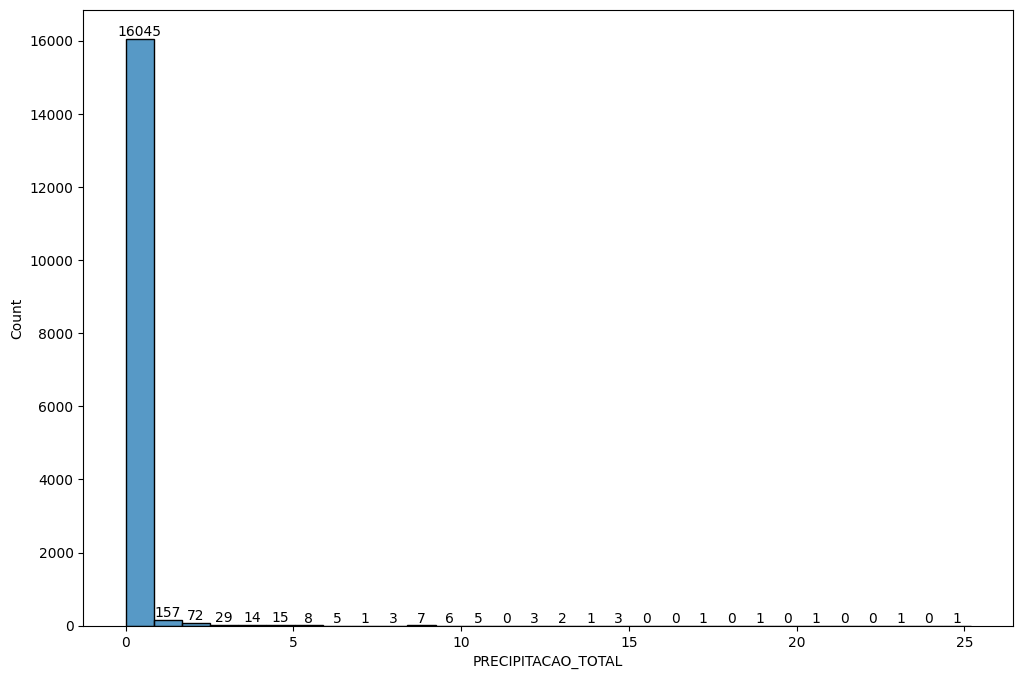

In [152]:
fig, ax = plt.subplots(figsize= (12, 8))

ax = sns.histplot(
    data= df,
    x= "PRECIPITACAO_TOTAL",
    bins= 30
)

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{int(height)}', ha='center', va='bottom')

plt.show()

> **Associado à região (de sertão)** é condizente com a realidade esperada. **Chuvas são incomuns**, **mais de 93% das entradas captadas** pela estação metereológica **mostram a ausência de chuva.**

#### Correlação

<Axes: >

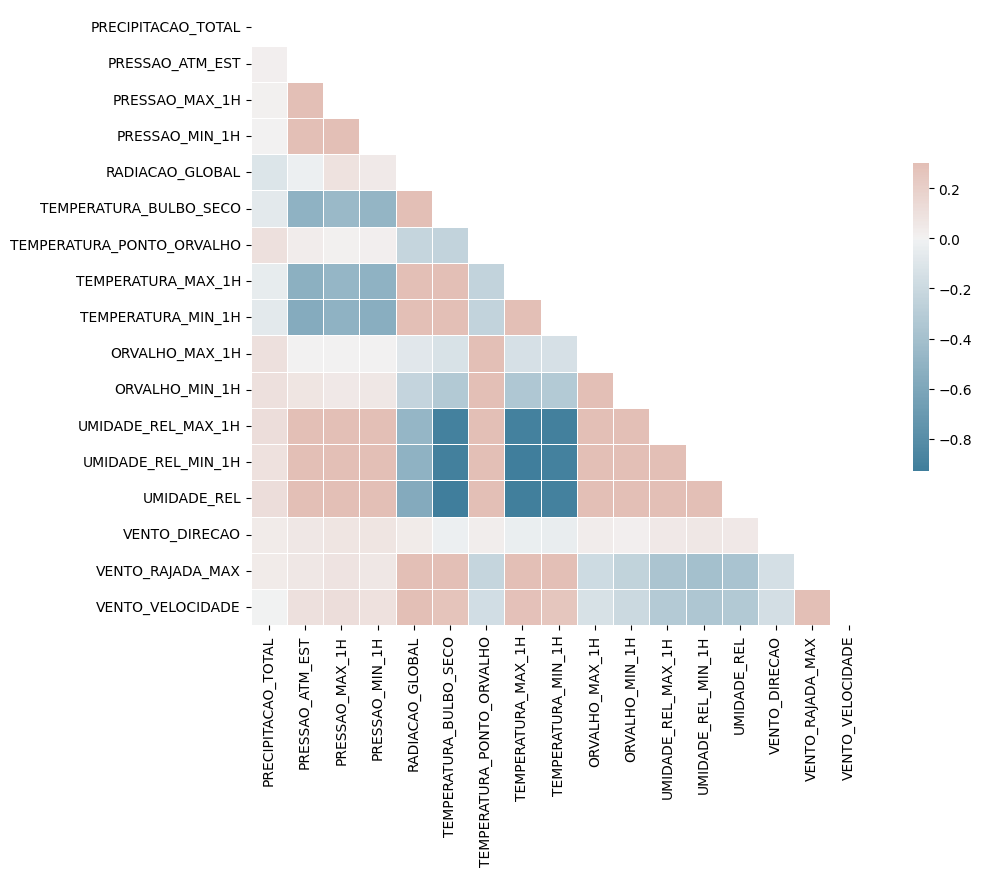

In [122]:
# Matriz de correlação
corr = df.iloc[:, 2:].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Figure
f, ax = plt.subplots(figsize=(12, 8))

# Colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# plot
sns.heatmap(corr, mask=mask, 
            cmap=cmap, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5})

> É nítido que **há uma correação fraquíssima com qualquer outra variável** do nosso dataset. Entretanto, **isto pode ser um viés**, uma vez que **grande parte dos valores de preciptação total são iguais à zero.**